In [2]:
import scipy.special as SSp
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy.ndimage
from scipy import fftpack

In [3]:
def gaussianizepdf(denf,avgrepeats=True, sigmagauss = None,assumelognormal=True):
    denshape = denf.shape
    denff = denf.flatten()
    o_f = np.argsort(denff)
    gaussf = 0.*denff.astype(np.float)
    lenny = len(gaussf)

    if (sigmagauss == None):
        if assumelognormal:
            sigmagauss = np.sqrt(np.log1p(np.var(denff)))
        else:
            sigmagauss = np.std(denff)
    print(sigmagauss)

    step = 1./lenny

    gaussf[o_f] = np.sqrt(2.)*sigmagauss*SSp.erfinv(2.*np.arange(0.5*step,1,step)-1.)

    # average together repeated elements
    if (avgrepeats):
        cuts = np.searchsorted(denff[o_f],np.unique(denff[o_f]))
        print(len(cuts),'cuts')
        for i in range(len(cuts)-1):
            gaussf[o_f[cuts[i]:cuts[i+1]]] = np.mean(gaussf[o_f[cuts[i]:cuts[i+1]]])
        # get the last one
        gaussf[o_f[cuts[-1]:]]=np.mean(gaussf[o_f[cuts[-1]:]])

    gaussf = gaussf.reshape(denshape)

    return gaussf

In [4]:
image_data = fits.open('file:///C:/cygwin64/home/rehg98/WLconv_z1100.00_0580r.fits')[0].data.astype(float)

In [5]:
image_data_1 = scipy.ndimage.filters.gaussian_filter(image_data, 9.75)
image_data_2 = scipy.ndimage.filters.gaussian_filter(image_data, 19.5)
image_data_5 = scipy.ndimage.filters.gaussian_filter(image_data, 48.76)

In [6]:
gauss_data_1 = gaussianizepdf(image_data_1)
gauss_data_2 = gaussianizepdf(image_data_2)
gauss_data_5 = gaussianizepdf(image_data_5)

0.0625684912735
4194304 cuts
0.0512676133487
4194304 cuts
0.037456304616
4194304 cuts


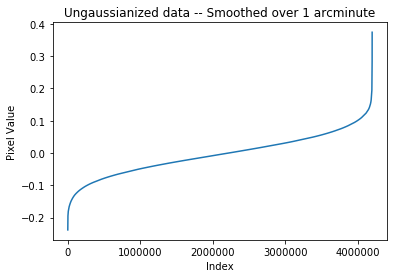

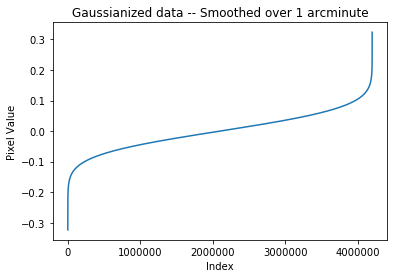

In [7]:
plt.plot(np.sort(image_data_1.flatten()))
plt.title('Ungaussianized data -- Smoothed over 1 arcminute')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

plt.plot(np.sort(gauss_data_1.flatten()))  
plt.title('Gaussianized data -- Smoothed over 1 arcminute')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

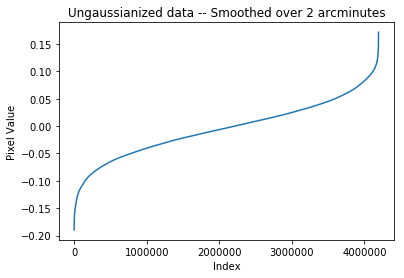

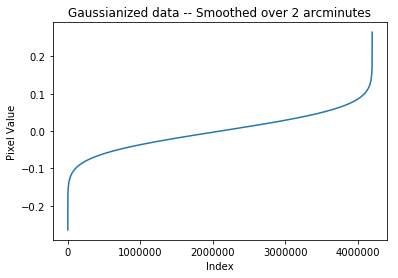

In [8]:
plt.plot(np.sort(image_data_2.flatten()))
plt.title('Ungaussianized data -- Smoothed over 2 arcminutes')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

plt.plot(np.sort(gauss_data_2.flatten()))  
plt.title('Gaussianized data -- Smoothed over 2 arcminutes')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

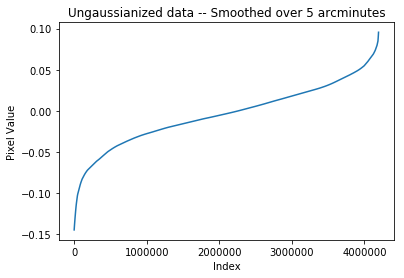

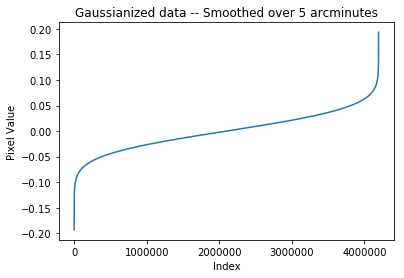

In [9]:
plt.plot(np.sort(image_data_5.flatten()))
plt.title('Ungaussianized data -- Smoothed over 5 arcminutes')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

plt.plot(np.sort(gauss_data_5.flatten()))  
plt.title('Gaussianized data -- Smoothed over 5 arcminutes')
plt.xlabel("Index")
plt.ylabel("Pixel Value")
plt.show()

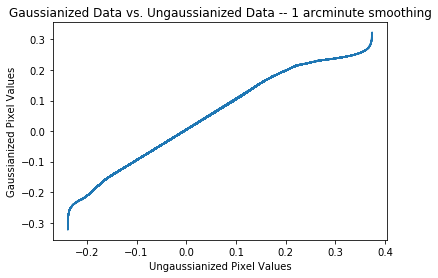

In [12]:
plt.plot(image_data_1.flatten(), gauss_data_1.flatten())
plt.title("Gaussianized Data vs. Ungaussianized Data -- 1 arcminute smoothing")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

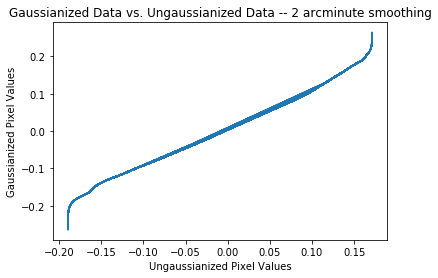

In [13]:
plt.plot(image_data_2.flatten(), gauss_data_2.flatten())
plt.title("Gaussianized Data vs. Ungaussianized Data -- 2 arcminute smoothing")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()

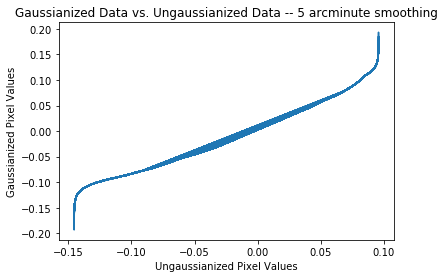

In [14]:
plt.plot(image_data_5.flatten(), gauss_data_5.flatten())
plt.title("Gaussianized Data vs. Ungaussianized Data -- 5 arcminute smoothing")
plt.xlabel("Ungaussianized Pixel Values")
plt.ylabel("Gaussianized Pixel Values")
plt.show()